# Terminal Assignment-Based Assessment


# Part B. Logistic Regression on Cardiac data


## importing libraries

In [1]:
import pandas as pd
import numpy as np
from numpy import random
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, roc_auc_score, auc

# Reading housing.csv file

In [2]:
# Load the dataset
file_path = "C:\\Users\\HP\\Desktop\\Stats TABA\\cardiac.csv" 
df_card = pd.read_csv(file_path)
print(df_card.head(6))

   caseno  age  weight  gender  fitness_score cardiac_condition
0       1   37   70.47    Male          55.79            Absent
1       2   73   50.34  Female          35.00            Absent
2       3   46   87.65    Male          42.93           Present
3       4   36   89.80  Female          28.30           Present
4       5   34  103.02    Male          40.56            Absent
5       6   39   77.37  Female          33.00            Absent


## Exploratory Data Analysis

### dataset summary

In [3]:
df_card.shape

(100, 6)

In [4]:
df_card.describe()

,caseno,age,weight,fitness_score
count,100.000000,100.00000,100.000000,100.000000
mean,50.500000,41.10000,79.660300,43.629800
std,29.011492,9.14253,15.089842,8.571306
min,1.000000,30.00000,50.000000,27.350000
25%,25.750000,34.00000,69.732500,36.595000
50%,50.500000,39.00000,79.240000,42.730000
75%,75.250000,45.25000,89.912500,49.265000
max,100.000000,74.00000,115.420000,62.500000


#### Check data type

In [5]:
df_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   caseno             100 non-null    int64  
 1   age                100 non-null    int64  
 2   weight             100 non-null    float64
 3   gender             100 non-null    object 
 4   fitness_score      100 non-null    float64
 5   cardiac_condition  100 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 4.8+ KB


#### Check null values

In [6]:
df_card.isnull().sum()

caseno               0
age                  0
weight               0
gender               0
fitness_score        0
cardiac_condition    0
dtype: int64

#### Check Unique Values

In [7]:
df_card.nunique()

caseno               100
age                   29
weight                99
gender                 2
fitness_score         96
cardiac_condition      2
dtype: int64

In [8]:
#df_card['gender'] = LabelEncoder().fit_transform(df_card['gender'])

Removing the first column as it is not considering as feature

In [9]:
df_card = df_card.drop('caseno', axis=1)

#### One hot encoding for gender column

In [10]:
df_encoded = pd.get_dummies(df_card, columns=['gender'])

In [11]:
df_encoded

,age,weight,fitness_score,cardiac_condition,gender_Female,gender_Male
0,37,70.47,55.79,Absent,False,True
1,73,50.34,35.00,Absent,True,False
2,46,87.65,42.93,Present,False,True
3,36,89.80,28.30,Present,True,False
4,34,103.02,40.56,Absent,False,True
...,...,...,...,...,...,...
95,42,111.98,33.73,Present,False,True
96,43,88.07,49.22,Present,False,True
97,45,94.07,41.97,Present,False,True
98,58,97.46,35.20,Present,False,True


#### Check data type after encoding

In [12]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                100 non-null    int64  
 1   weight             100 non-null    float64
 2   fitness_score      100 non-null    float64
 3   cardiac_condition  100 non-null    object 
 4   gender_Female      100 non-null    bool   
 5   gender_Male        100 non-null    bool   
dtypes: bool(2), float64(2), int64(1), object(1)
memory usage: 3.4+ KB


#### Check distribution of the target variable "cardiac_condition"

C:\Users\HP\.conda\envs\deba\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\.conda\envs\deba\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\.conda\envs\deba\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


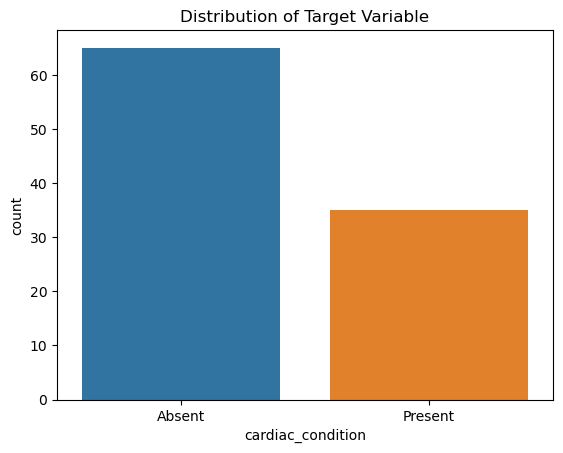

In [13]:
sns.countplot(x='cardiac_condition', data=df_encoded)
plt.title('Distribution of Target Variable')
plt.show()

#### LableEncode the target column "cardiac_condition"

In [14]:
df_card_cor=df_encoded

In [15]:
df_card_cor['cardiac_condition'] = LabelEncoder().fit_transform(df_card_cor['cardiac_condition'])

C:\Users\HP\.conda\envs\deba\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\HP\.conda\envs\deba\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [16]:
df_card_cor

,age,weight,fitness_score,cardiac_condition,gender_Female,gender_Male
0,37,70.47,55.79,0,False,True
1,73,50.34,35.00,0,True,False
2,46,87.65,42.93,1,False,True
3,36,89.80,28.30,1,True,False
4,34,103.02,40.56,0,False,True
...,...,...,...,...,...,...
95,42,111.98,33.73,1,False,True
96,43,88.07,49.22,1,False,True
97,45,94.07,41.97,1,False,True
98,58,97.46,35.20,1,False,True


In [17]:
df_card_cor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                100 non-null    int64  
 1   weight             100 non-null    float64
 2   fitness_score      100 non-null    float64
 3   cardiac_condition  100 non-null    int32  
 4   gender_Female      100 non-null    bool   
 5   gender_Male        100 non-null    bool   
dtypes: bool(2), float64(2), int32(1), int64(1)
memory usage: 3.1 KB


#### Correlation Matrix

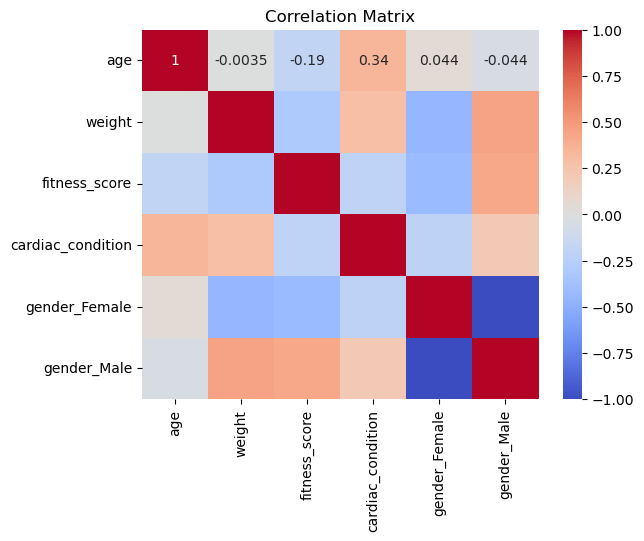

In [18]:
correlation_matrix = df_card_cor.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [19]:
correlation_matrix

,age,weight,fitness_score,cardiac_condition,gender_Female,gender_Male
age,1.000000,-0.003542,-0.191185,0.344561,0.043944,-0.043944
weight,-0.003542,1.000000,-0.307447,0.283997,-0.449530,0.449530
fitness_score,-0.191185,-0.307447,1.000000,-0.203707,-0.423999,0.423999
cardiac_condition,0.344561,0.283997,-0.203707,1.000000,-0.214953,0.214953
gender_Female,0.043944,-0.449530,-0.423999,-0.214953,1.000000,-1.000000
gender_Male,-0.043944,0.449530,0.423999,0.214953,-1.000000,1.000000


#### Distribution of variable (without caseno)

C:\Users\HP\.conda\envs\deba\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\.conda\envs\deba\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\.conda\envs\deba\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\.conda\envs\deba\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

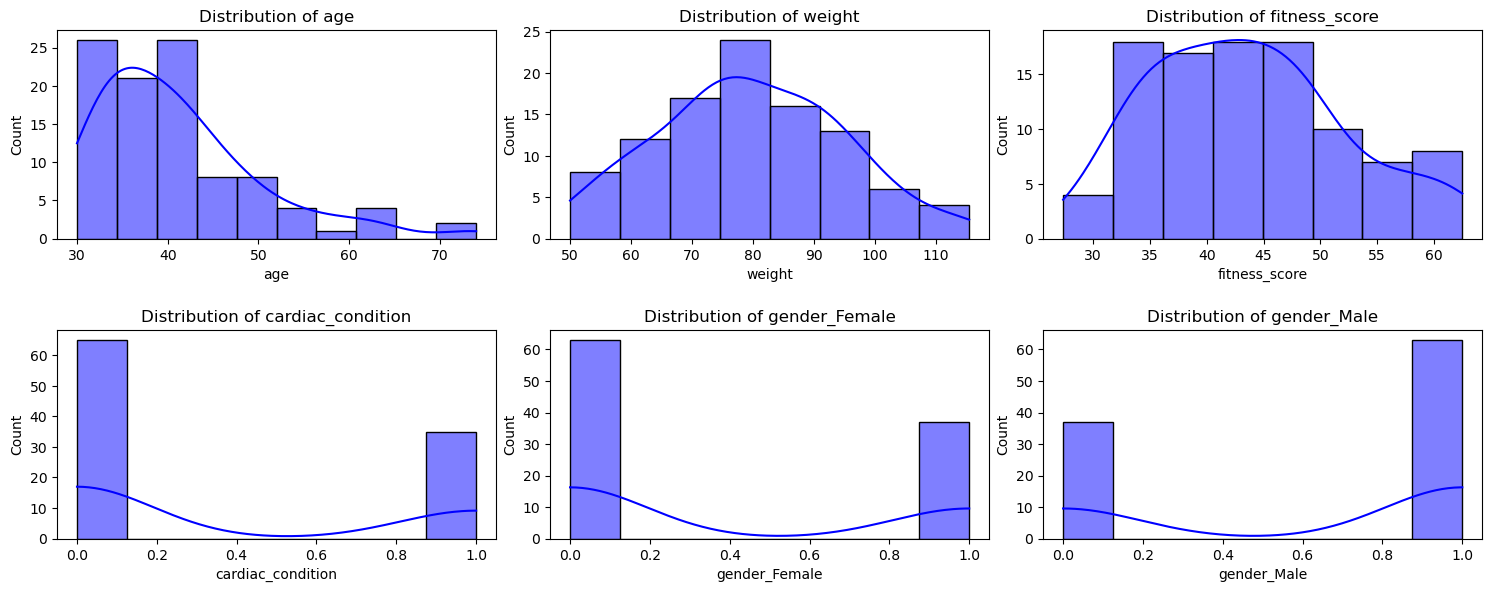

In [20]:
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(15, 6))
index = 0
axs = axs.flatten()

for k, v in df_card_cor.items():
    if k != 'caseno':
        sns.histplot(v, ax=axs[index], color='blue', kde=True)
        axs[index].set_title(f'Distribution of {k}')
        index += 1
plt.tight_layout(pad=1, w_pad=0.5, h_pad=2)
plt.show()

#### Distribution Plot

C:\Users\HP\.conda\envs\deba\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\.conda\envs\deba\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


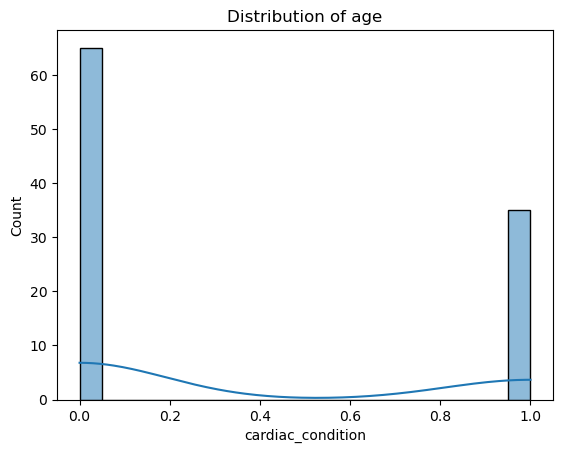

C:\Users\HP\.conda\envs\deba\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\.conda\envs\deba\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


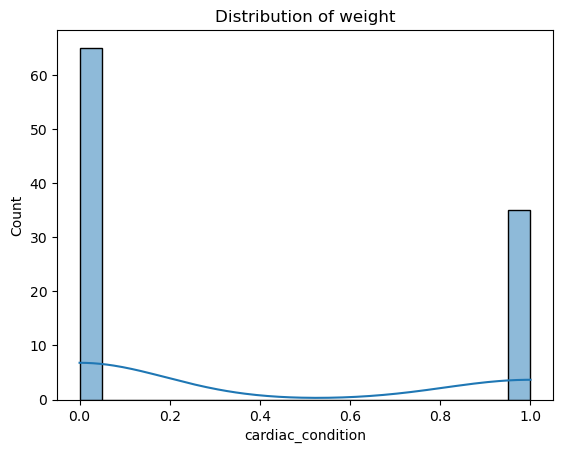

C:\Users\HP\.conda\envs\deba\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\.conda\envs\deba\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


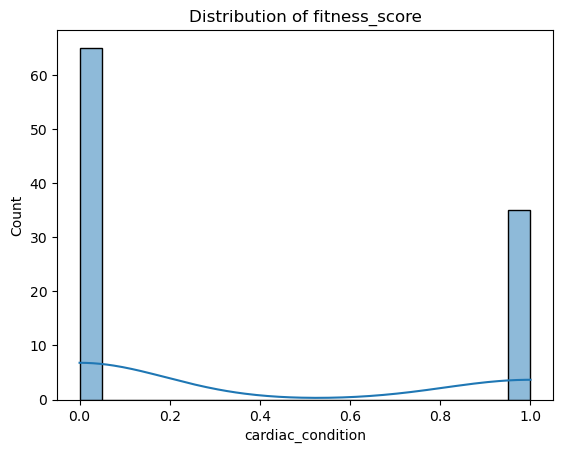

In [21]:
numerical_features = df_card.select_dtypes(include=['float', 'int']).columns
for feature in numerical_features:
    sns.histplot(df_card_cor['cardiac_condition'], bins=20, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

#### Boxplot of variables with cardiac_condition

C:\Users\HP\.conda\envs\deba\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\.conda\envs\deba\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\.conda\envs\deba\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


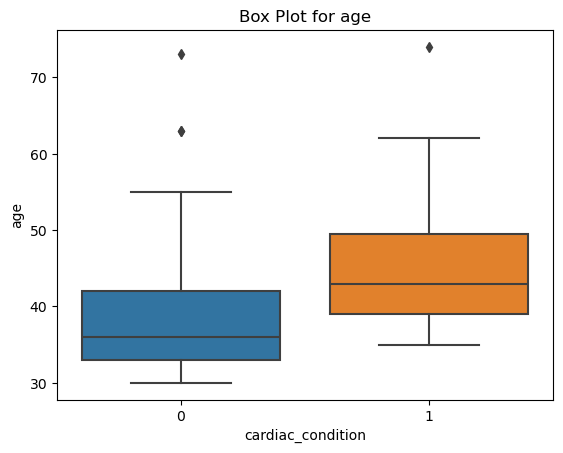

C:\Users\HP\.conda\envs\deba\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\.conda\envs\deba\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\.conda\envs\deba\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


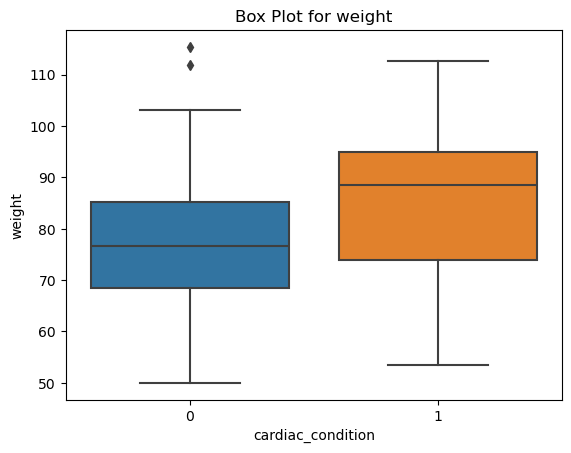

C:\Users\HP\.conda\envs\deba\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\.conda\envs\deba\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\.conda\envs\deba\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


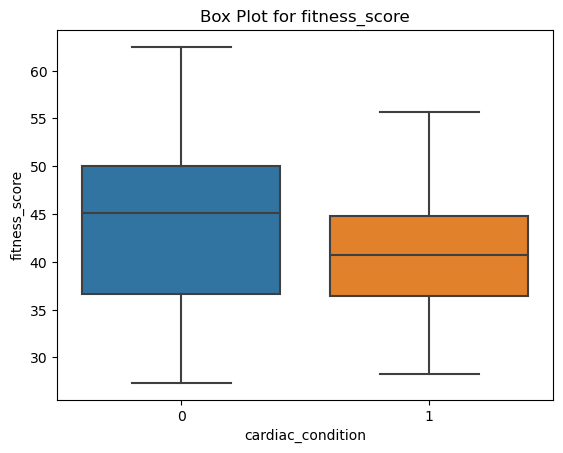

C:\Users\HP\.conda\envs\deba\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\.conda\envs\deba\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\.conda\envs\deba\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


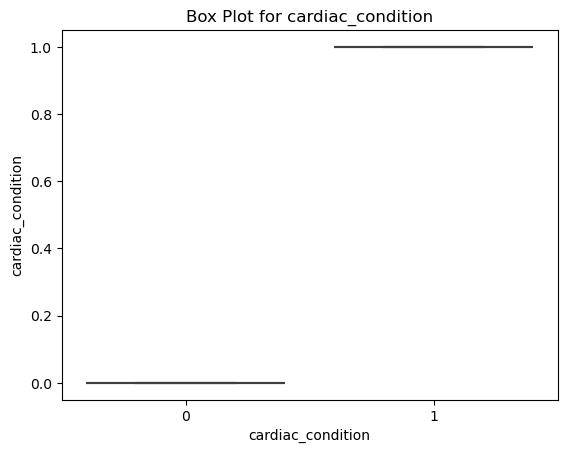

In [23]:
numerical_features = df_card_cor.select_dtypes(include=['float', 'int']).columns
for feature in numerical_features:
    sns.boxplot(x='cardiac_condition', y=feature, data=df_card_cor)
    plt.title(f'Box Plot for {feature}')
    plt.show()


#### Boxplot

C:\Users\HP\.conda\envs\deba\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\.conda\envs\deba\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\.conda\envs\deba\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\.conda\envs\deba\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

Total columns affected: 4


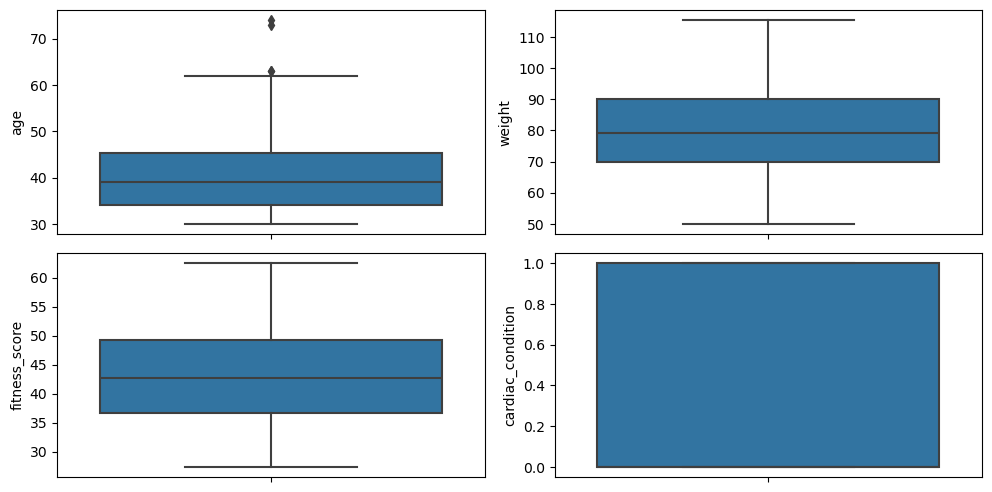

In [24]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(10, 5))
axs = axs.flatten()
i = 0
for k,v in df_card_cor.items():
    if pd.api.types.is_integer_dtype(v) or pd.api.types.is_float_dtype(v):   
        sns.boxplot(y=k, data=df_card_cor, ax=axs[i])
        i += 1
plt.tight_layout(pad=1, w_pad=1, h_pad=1)
print("Total columns affected:", i)

#### Violin plot of independent variables against the dependent variable

C:\Users\HP\.conda\envs\deba\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\.conda\envs\deba\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\.conda\envs\deba\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


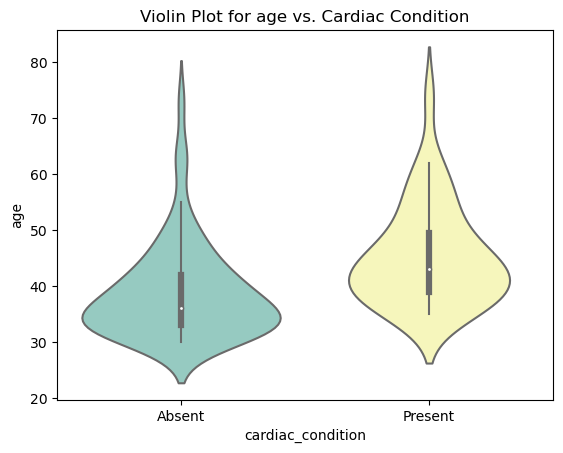

C:\Users\HP\.conda\envs\deba\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\.conda\envs\deba\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\.conda\envs\deba\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


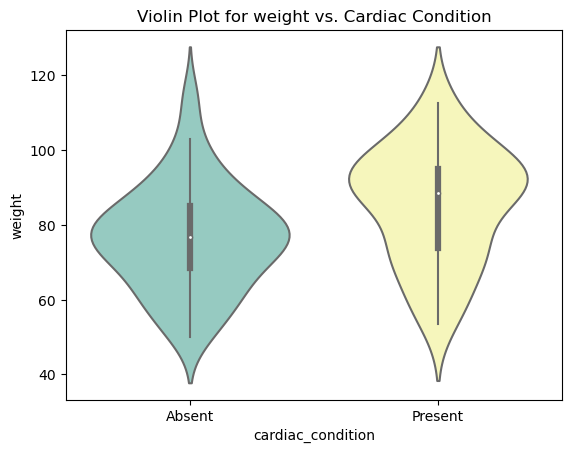

C:\Users\HP\.conda\envs\deba\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\.conda\envs\deba\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\.conda\envs\deba\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


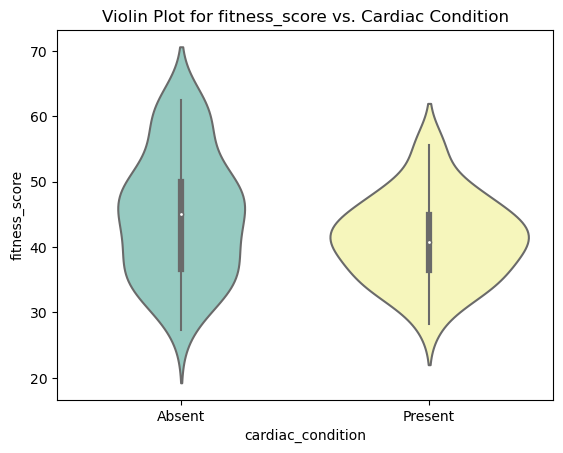

In [51]:
numerical_features = df_card.select_dtypes(include=['float', 'int']).columns
for feature in numerical_features:
    sns.violinplot(x='cardiac_condition', y=feature, data=df_card, palette='Set3')
    plt.title(f'Violin Plot for {feature} vs. Cardiac Condition')
    plt.show()


#### Distribution of independent variables against the dependent variable

C:\Users\HP\AppData\Local\Temp\ipykernel_10076\3410286591.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_card_cor[df_card_cor['cardiac_condition'] == 0][feature], label='Class 0', shade=True)
C:\Users\HP\.conda\envs\deba\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\.conda\envs\deba\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\AppData\Local\Temp\ipykernel_10076\3410286591.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`

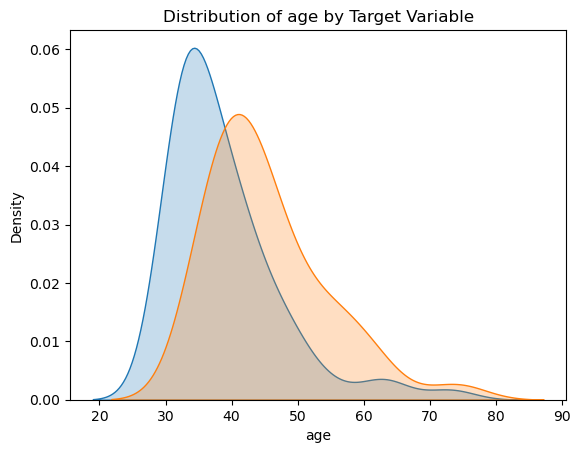

C:\Users\HP\AppData\Local\Temp\ipykernel_10076\3410286591.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_card_cor[df_card_cor['cardiac_condition'] == 0][feature], label='Class 0', shade=True)
C:\Users\HP\.conda\envs\deba\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\.conda\envs\deba\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\AppData\Local\Temp\ipykernel_10076\3410286591.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`

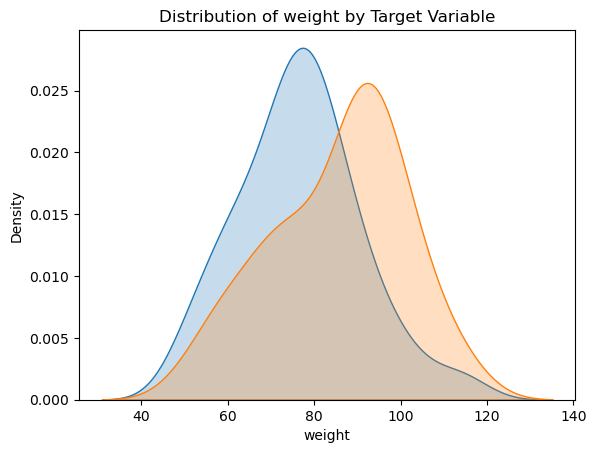

C:\Users\HP\AppData\Local\Temp\ipykernel_10076\3410286591.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_card_cor[df_card_cor['cardiac_condition'] == 0][feature], label='Class 0', shade=True)
C:\Users\HP\.conda\envs\deba\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\.conda\envs\deba\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\AppData\Local\Temp\ipykernel_10076\3410286591.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`

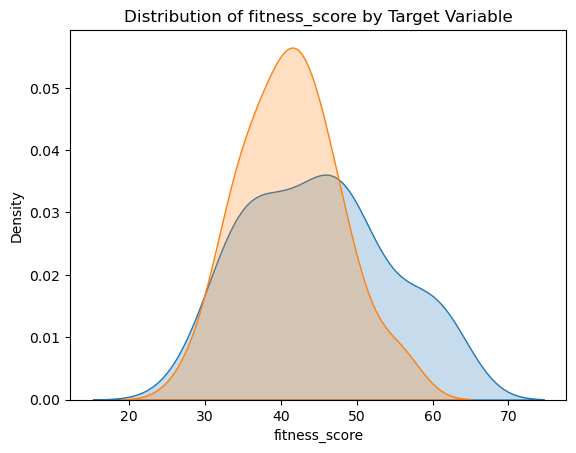

C:\Users\HP\AppData\Local\Temp\ipykernel_10076\3410286591.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_card_cor[df_card_cor['cardiac_condition'] == 0][feature], label='Class 0', shade=True)
C:\Users\HP\.conda\envs\deba\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\.conda\envs\deba\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\AppData\Local\Temp\ipykernel_10076\3410286591.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singula

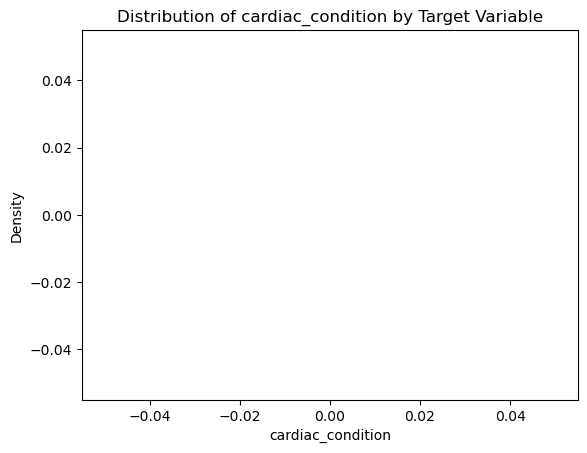

C:\Users\HP\AppData\Local\Temp\ipykernel_10076\3410286591.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_card_cor[df_card_cor['cardiac_condition'] == 0][feature], label='Class 0', shade=True)
C:\Users\HP\.conda\envs\deba\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\.conda\envs\deba\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\AppData\Local\Temp\ipykernel_10076\3410286591.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`

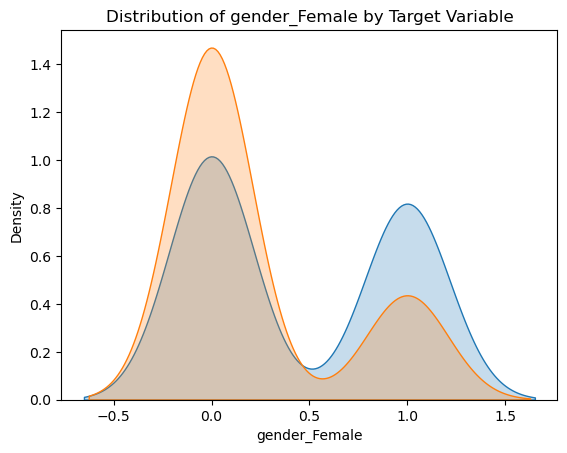

C:\Users\HP\AppData\Local\Temp\ipykernel_10076\3410286591.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_card_cor[df_card_cor['cardiac_condition'] == 0][feature], label='Class 0', shade=True)
C:\Users\HP\.conda\envs\deba\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\.conda\envs\deba\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\AppData\Local\Temp\ipykernel_10076\3410286591.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`

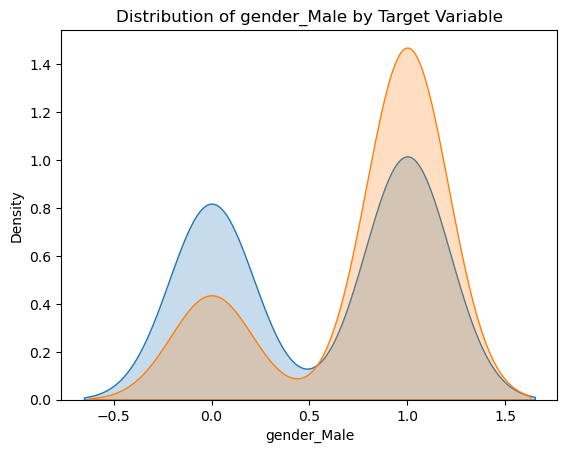

In [26]:
numerical_features = df_card_cor.select_dtypes(include=['float', 'int','bool']).columns
for feature in numerical_features:
    sns.kdeplot(df_card_cor[df_card_cor['cardiac_condition'] == 0][feature], label='Class 0', shade=True)
    sns.kdeplot(df_card_cor[df_card_cor['cardiac_condition'] == 1][feature], label='Class 1', shade=True)
    plt.title(f'Distribution of {feature} by Target Variable')
    plt.show()



#### Check outliers percentage

In [27]:
for key, value in df_card_cor.items():
    if pd.api.types.is_integer_dtype(value) or pd.api.types.is_float_dtype(value):
        q1 = value.quantile(0.25)
        q3 = value.quantile(0.75)
        iqr = q3 - q1
        value_col = value[(value <= q1 - 1.5 * iqr) | (value >= q3 + 1.5 * iqr)]
        perc = np.shape(value_col)[0] * 100.0 / np.shape(df_card_cor)[0]
        print(np.shape(value_col)[0])
        print("%s has Outliers percentage of : %.2f%%" % (key, perc))

4
age has Outliers percentage of : 4.00%
0
weight has Outliers percentage of : 0.00%
0
fitness_score has Outliers percentage of : 0.00%
0
cardiac_condition has Outliers percentage of : 0.00%


There are 4% ouliers in age column. Will remove that. 

#### Removing outliers by log transformation

In [28]:
df_transformed = df_card_cor.copy() 
df_transformed['age'] = np.log1p(df_card_cor['age'])  # Log transformation

In [29]:
print(df_transformed)

         age  weight  fitness_score  cardiac_condition  gender_Female  \
0   3.637586   70.47          55.79                  0          False   
1   4.304065   50.34          35.00                  0           True   
2   3.850148   87.65          42.93                  1          False   
3   3.610918   89.80          28.30                  1           True   
4   3.555348  103.02          40.56                  0          False   
..       ...     ...            ...                ...            ...   
95  3.761200  111.98          33.73                  1          False   
96  3.784190   88.07          49.22                  1          False   
97  3.828641   94.07          41.97                  1          False   
98  4.077537   97.46          35.20                  1          False   
99  4.127134   93.76          32.00                  1          False   

    gender_Male  
0          True  
1         False  
2          True  
3         False  
4          True  
..          ...

#### Check the boxplot after handling ouliers

C:\Users\HP\.conda\envs\deba\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Total columns affected: 4


C:\Users\HP\.conda\envs\deba\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\.conda\envs\deba\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\.conda\envs\deba\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


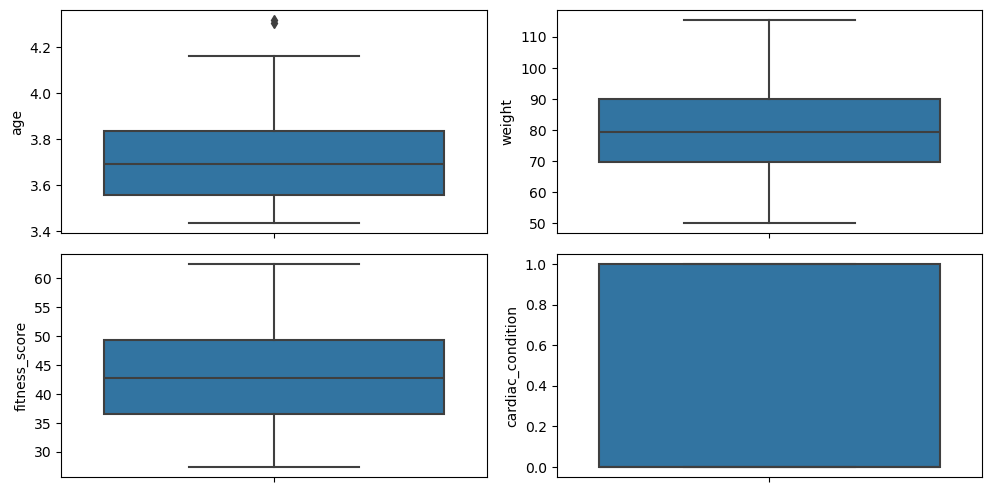

In [30]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(10, 5))
axs = axs.flatten()
i = 0
for k,v in df_transformed.items():
    if pd.api.types.is_integer_dtype(v) or pd.api.types.is_float_dtype(v):   
        sns.boxplot(y=k, data=df_transformed, ax=axs[i])
        i += 1
plt.tight_layout(pad=1, w_pad=1, h_pad=1)
print("Total columns affected:", i)

Check the outliers percentage. We can see now it's reduced to 2%. we can proceed further.

In [31]:
for key, value in df_transformed.items():
    if pd.api.types.is_integer_dtype(value) or pd.api.types.is_float_dtype(value):
        q1 = value.quantile(0.25)
        q3 = value.quantile(0.75)
        iqr = q3 - q1
        value_col = value[(value <= q1 - 1.5 * iqr) | (value >= q3 + 1.5 * iqr)]
        perc = np.shape(value_col)[0] * 100.0 / np.shape(df_transformed)[0]
        print(np.shape(value_col)[0])
        print("%s has Outliers percentage of : %.2f%%" % (key, perc))

2
age has Outliers percentage of : 2.00%
0
weight has Outliers percentage of : 0.00%
0
fitness_score has Outliers percentage of : 0.00%
0
cardiac_condition has Outliers percentage of : 0.00%


In [32]:
print(df_transformed)

         age  weight  fitness_score  cardiac_condition  gender_Female  \
0   3.637586   70.47          55.79                  0          False   
1   4.304065   50.34          35.00                  0           True   
2   3.850148   87.65          42.93                  1          False   
3   3.610918   89.80          28.30                  1           True   
4   3.555348  103.02          40.56                  0          False   
..       ...     ...            ...                ...            ...   
95  3.761200  111.98          33.73                  1          False   
96  3.784190   88.07          49.22                  1          False   
97  3.828641   94.07          41.97                  1          False   
98  4.077537   97.46          35.20                  1          False   
99  4.127134   93.76          32.00                  1          False   

    gender_Male  
0          True  
1         False  
2          True  
3         False  
4          True  
..          ...

# Modelling

#### Spilt the dataset

In [33]:
# Define features (X) and target variable (y)
X = df_transformed[['age', 'weight', 'gender_Female','gender_Male', 'fitness_score']]
y = df_transformed['cardiac_condition']

# Split the dataset into train and test partitions
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22242821)

In [34]:
print(X_train.head())

         age  weight  gender_Female  gender_Male  fitness_score
54  3.761200   64.00           True        False          35.00
69  3.784190   60.31           True        False          47.92
15  3.688879   79.81           True        False          34.48
93  3.610918   70.84          False         True          55.91
28  3.713572   90.92          False         True          38.06


#### Standardize the features

In [35]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


C:\Users\HP\.conda\envs\deba\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\HP\.conda\envs\deba\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\HP\.conda\envs\deba\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\HP\.conda\envs\deba\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtyp

#### Model Training (Intermediate Model)

In [36]:
model_intermediate = LogisticRegression(random_state=22242821)
model_intermediate.fit(X_train, y_train)

C:\Users\HP\.conda\envs\deba\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\HP\.conda\envs\deba\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\HP\.conda\envs\deba\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\HP\.conda\envs\deba\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtyp

LogisticRegression(random_state=22242821)

#### Model Training (Final Model)

In [37]:
# Fit the logistic regression model
model = LogisticRegression(random_state=22242821)
model.fit(X_train_scaled, y_train)

C:\Users\HP\.conda\envs\deba\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\HP\.conda\envs\deba\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


LogisticRegression(random_state=22242821)

# Interpretation 
### binary logistic regression model (Intermediate)

In [38]:
# Coefficients and Intercept
coefficients = model_intermediate.coef_
intercept = model_intermediate.intercept_

feature_names = [f"Feature_{i}" for i in range(1, X_test.shape[1] + 1)]

print("Coefficients:")
for feature, coef in zip(feature_names, coefficients[0]):
    print(f"{feature}: {coef:.4f}")
print(f"\nIntercept: {intercept[0]:.4f}")

Coefficients:
Feature_1: 1.6245
Feature_2: 0.0121
Feature_3: -0.5270
Feature_4: 0.5270
Feature_5: -0.0623

Intercept: -5.2258


C:\Users\HP\.conda\envs\deba\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\.conda\envs\deba\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\.conda\envs\deba\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


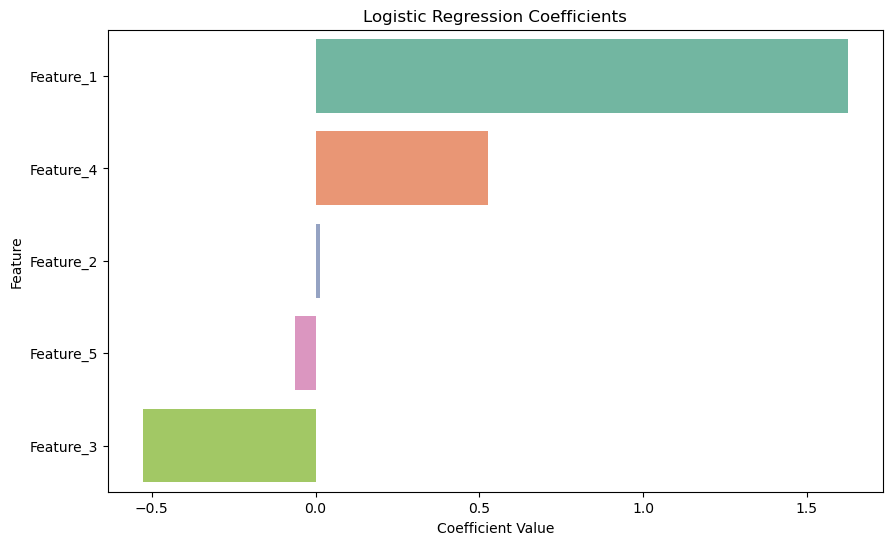

In [54]:
# Get coefficients and feature names
coefficients = model_intermediate.coef_[0]

#Create a DataFrame for visualization
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the DataFrame by coefficient magnitude for better visualization
coefficients_df = coefficients_df.sort_values(by='Coefficient', ascending=False)

# Plot the coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients_df, palette='Set2')
plt.title('Logistic Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

### binary logistic regression model (Final)

In [40]:
# Coefficients and Intercept
coefficients = model.coef_
intercept = model.intercept_

feature_names = [f"Feature_{i}" for i in range(1, X_test_scaled.shape[1] + 1)]

print("Coefficients:")
for feature, coef in zip(feature_names, coefficients[0]):
    print(f"{feature}: {coef:.4f}")
print(f"\nIntercept: {intercept[0]:.4f}")

Coefficients:
Feature_1: 0.8176
Feature_2: 0.1438
Feature_3: -0.3227
Feature_4: 0.3227
Feature_5: -0.5472

Intercept: -0.8783


C:\Users\HP\.conda\envs\deba\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\.conda\envs\deba\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\.conda\envs\deba\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


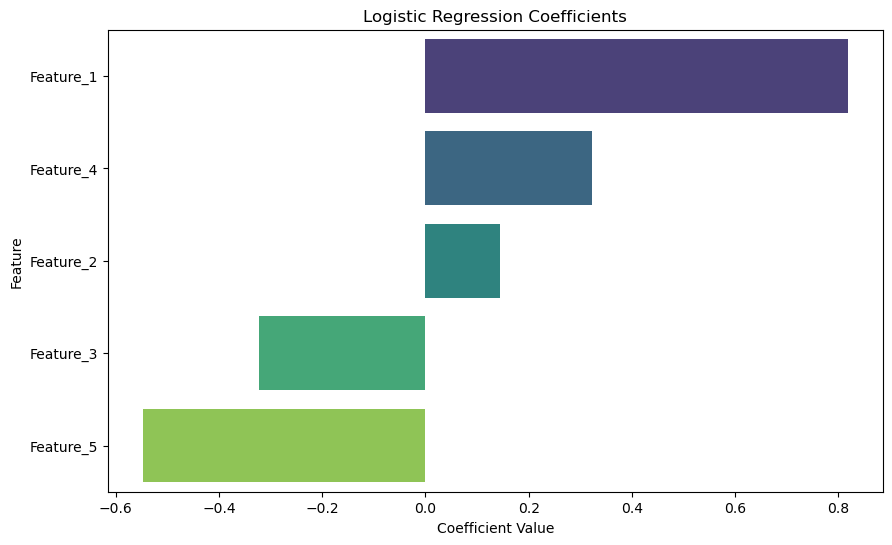

In [41]:
# Get coefficients and feature names
coefficients = model.coef_[0]

#Create a DataFrame for visualization
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the DataFrame by coefficient magnitude for better visualization
coefficients_df = coefficients_df.sort_values(by='Coefficient', ascending=False)

# Plot the coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients_df, palette='viridis')
plt.title('Logistic Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

## diagnosis

### Intermediate model

C:\Users\HP\.conda\envs\deba\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\HP\.conda\envs\deba\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\HP\.conda\envs\deba\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\HP\.conda\envs\deba\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtyp

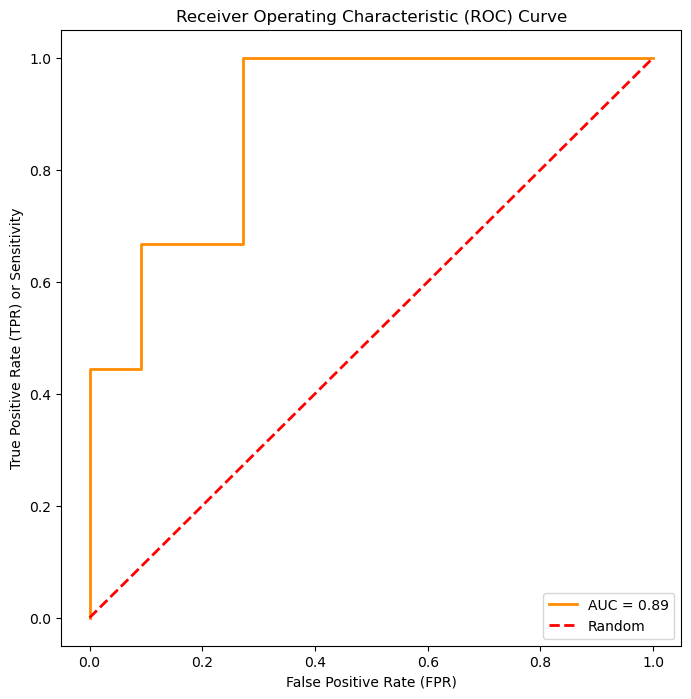

In [57]:
# Predict probabilities for the positive class
y_probs = model_intermediate.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR) or Sensitivity')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Final Model

C:\Users\HP\.conda\envs\deba\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\HP\.conda\envs\deba\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\HP\.conda\envs\deba\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\HP\.conda\envs\deba\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\HP\.conda\envs

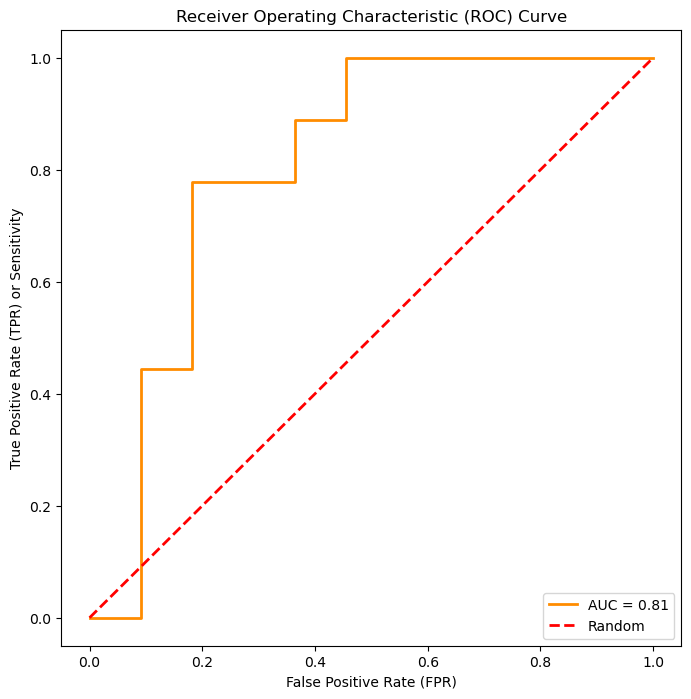

In [58]:
# Predict probabilities for the positive class
y_probs = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR) or Sensitivity')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [44]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Fit the logistic regression model on reduced features
model_pca = LogisticRegression(random_state=22242821)
model_pca.fit(X_train_pca, y_train)

# Evaluate the model with reduced features
y_pred_pca = model_pca.predict(X_test_pca)
print("\nAccuracy with PCA:", accuracy_score(y_test, y_pred_pca))
print("\nClassification Report with PCA:\n", classification_report(y_test, y_pred_pca))



Accuracy with PCA: 0.7

Classification Report with PCA:
               precision    recall  f1-score   support

           0       0.67      0.91      0.77        11
           1       0.80      0.44      0.57         9

    accuracy                           0.70        20
   macro avg       0.73      0.68      0.67        20
weighted avg       0.73      0.70      0.68        20



C:\Users\HP\.conda\envs\deba\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\HP\.conda\envs\deba\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\HP\.conda\envs\deba\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\HP\.conda\envs\deba\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_e

C:\Users\HP\.conda\envs\deba\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\HP\.conda\envs\deba\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\HP\.conda\envs\deba\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\HP\.conda\envs\deba\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtyp

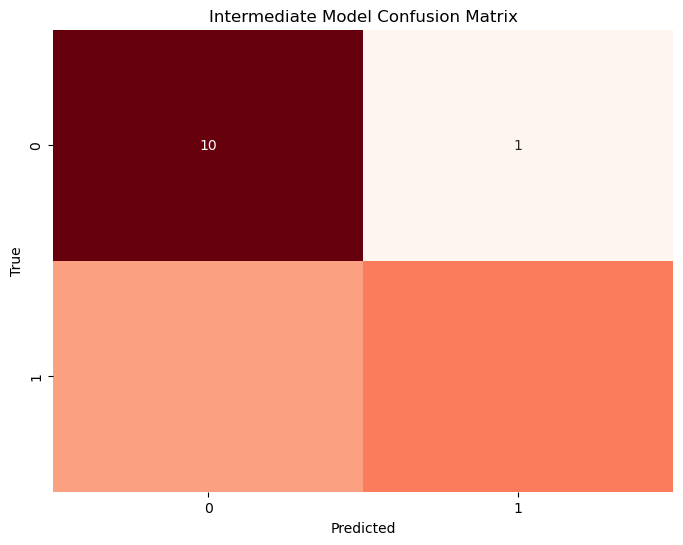

C:\Users\HP\.conda\envs\deba\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\HP\.conda\envs\deba\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\HP\.conda\envs\deba\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\HP\.conda\envs\deba\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtyp

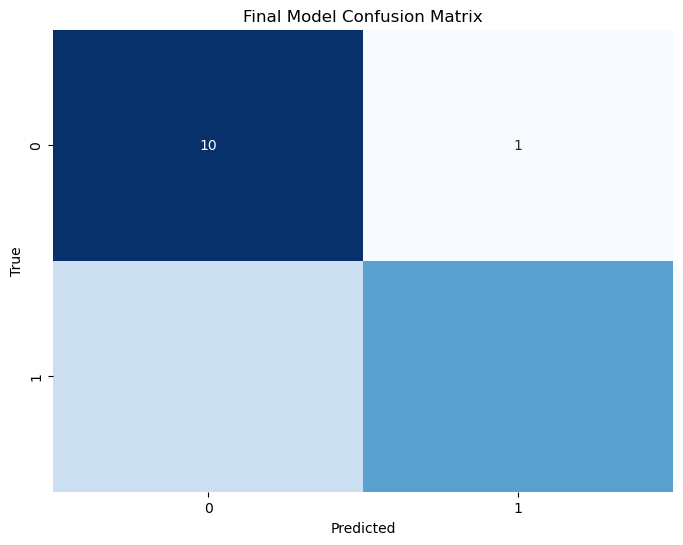

In [45]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X_test, X_test_scaled, y_test are your test features and labels
# Replace them with your actual test features and labels for both models

# Predictions for the Intermediate Model
y_pred_intermediate = model_intermediate.predict(X_test)

# Intermediate Model Confusion Matrix
cm_intermediate = confusion_matrix(y_test, y_pred_intermediate)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_intermediate, annot=True, fmt="d", cmap="Reds", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Intermediate Model Confusion Matrix")
plt.show()

# Predictions for the Final Model
X_test_scaled = scaler.transform(X_test)  # Assuming 'scaler' is the StandardScaler used for scaling
y_pred_final = model.predict(X_test_scaled)

# Final Model Confusion Matrix
cm_final = confusion_matrix(y_test, y_pred_final)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_final, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Final Model Confusion Matrix")
plt.show()


In [49]:
# Print confusion matrices
print("Intermediate Model Confusion Matrix:")
print(cm_intermediate)

print("\nFinal Model Confusion Matrix:")
print(cm_final)

# Print predicted values
print("\nIntermediate Model Predicted Values:")
print(y_pred_intermediate)

print("\nFinal Model Predicted Values:")
print(y_pred_final)

Intermediate Model Confusion Matrix:
[[10  1]
 [ 4  5]]

Final Model Confusion Matrix:
[[10  1]
 [ 3  6]]

Intermediate Model Predicted Values:
[0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0]

Final Model Predicted Values:
[0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 1 1 0]


#### Evaluate the Intermediate model

In [46]:
# Predict on the test set
y_pred = model_intermediate.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

C:\Users\HP\.conda\envs\deba\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\HP\.conda\envs\deba\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\HP\.conda\envs\deba\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


Accuracy: 0.75

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.91      0.80        11
           1       0.83      0.56      0.67         9

    accuracy                           0.75        20
   macro avg       0.77      0.73      0.73        20
weighted avg       0.77      0.75      0.74        20



C:\Users\HP\.conda\envs\deba\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\HP\.conda\envs\deba\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\HP\.conda\envs\deba\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\HP\.conda\envs\deba\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_e

#### Evaluate the Final model

In [47]:
# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


C:\Users\HP\.conda\envs\deba\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\HP\.conda\envs\deba\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\HP\.conda\envs\deba\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\HP\.conda\envs\deba\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_e

Accuracy: 0.8

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.91      0.83        11
           1       0.86      0.67      0.75         9

    accuracy                           0.80        20
   macro avg       0.81      0.79      0.79        20
weighted avg       0.81      0.80      0.80        20



C:\Users\HP\.conda\envs\deba\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\HP\.conda\envs\deba\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [48]:
!pip install --upgrade seaborn


  Using cached seaborn-0.13.1-py3-none-any.whl (294 kB)
  Using cached matplotlib-3.7.4-cp38-cp38-win_amd64.whl (7.5 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.3.2
    Uninstalling matplotlib-3.3.2:


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\__pycache__\\pylab.cpython-38.pyc'
Consider using the `--user` option or check the permissions.

